Import Libraries

In [ ]:
!pip install proplot
import proplot

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/Utility-Scoring-Of-Product-Reviews/Data

/content/gdrive/MyDrive/Utility-Scoring-Of-Product-Reviews/Data


Read dataset obtained from previous step where semantic scores are calculated

In [5]:
df=pd.read_csv("Cell_Phones_and_Accessories.csv")

In [6]:
df.head(4)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,preProcessed_reviewText,subjectivity_score,flesch_index,polarity_score,entropy_score,daleChall_index,helpful_ratio,lexDiversity_ratio
0,6073894996,"[3, 4]",4.0,This is a nice charger but you can tell it was...,"03 20, 2013",A29OXVQRZ154KX,this is a nice charger but you can tell it was...,0.650000,31.0,0.352083,5.632935,6.568111,0.666667,0.059278
1,9861203192,"[25, 25]",5.0,"Bought this for my new AT&T; Galaxy SII, the c...","10 7, 2011",A1847XXVEA8QUK,bought this for my new att galaxy sii the case...,0.562121,34.1,0.266970,5.800280,7.892625,0.966667,0.055556
2,9985537742,"[10, 11]",3.0,Works fine IF you don't move the phone. If yo...,"11 19, 2010",A2TOXBTDH3Y6R9,works fine if you dont move the phone if you ...,0.500000,25.1,0.280476,5.381458,7.162129,0.846154,0.068452
3,998554627X,"[5, 5]",5.0,was somewhat concerned after reading some of t...,"02 23, 2013",A17X3JUWJY3AXG,was somewhat concerned after reading some of t...,0.575000,16.9,0.375000,5.064869,8.279561,0.857143,0.108696


Make groups of dataset based on distinct values  of column 'overall' and compute average values of each semantic score for each group

In [7]:
groupedData=df.groupby(['overall']).mean()
groupedData

,subjectivity_score,flesch_index,polarity_score,entropy_score,daleChall_index,helpful_ratio,lexDiversity_ratio
overall,,,,,,,
1.0,0.484238,59.103723,0.054027,5.775360,7.501782,0.655842,0.064841
2.0,0.500586,88.074388,0.114199,6.118482,7.472139,0.682166,0.049249
3.0,0.506030,99.715965,0.144617,6.238965,7.432191,0.743456,0.043628
4.0,0.518328,119.390755,0.181107,6.392677,7.473809,0.792129,0.039053
5.0,0.534129,89.593952,0.238140,6.071549,7.583518,0.791947,0.054920


Add column 'overall' to grouped data

In [8]:
groupedData['overall']=[1,2,3,4,5]

Visualize line plot on grouped data for 'polarity_score' column vs 'overall' column

Text(0.5, 1.0, 'Polarity')

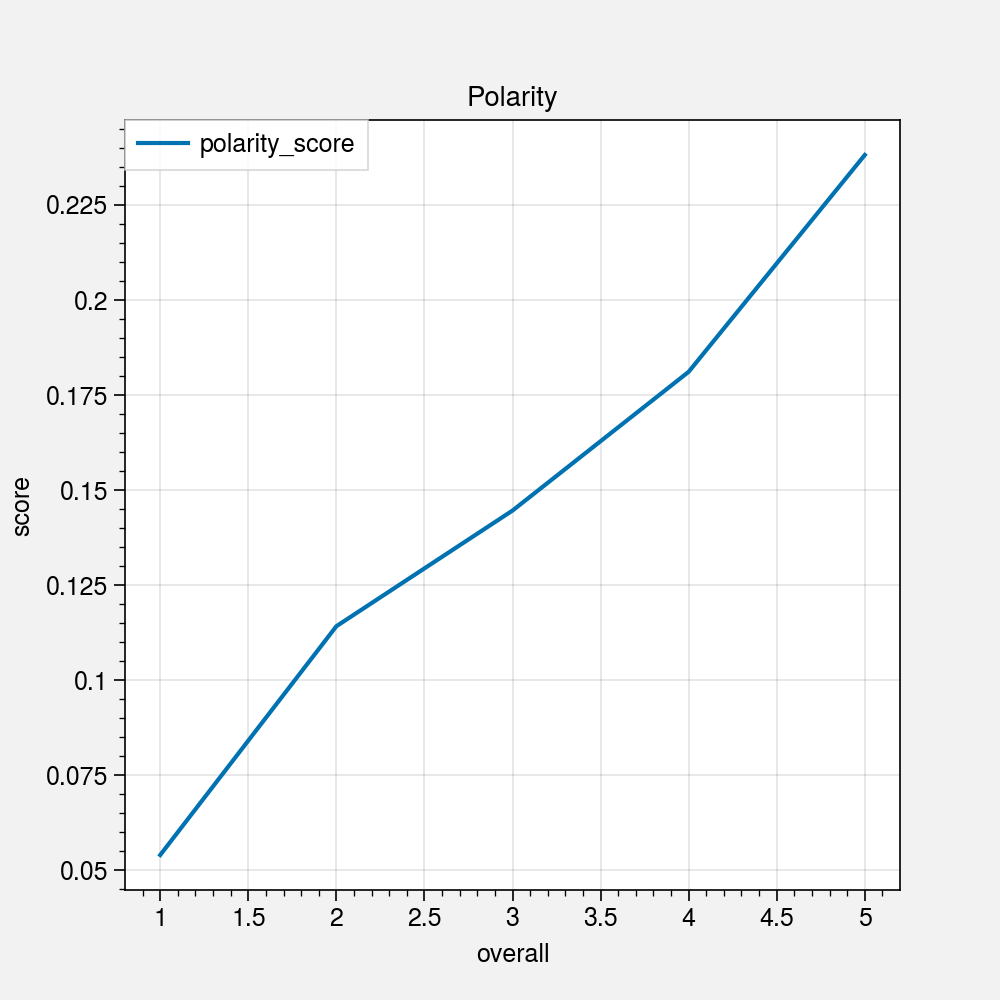

In [9]:
plt=groupedData.plot.line(x='overall',y='polarity_score', figsize=(5, 5))
plt.set_xlabel("overall")
plt.set_ylabel("score")
plt.set_title("Polarity")

Compute covariance between 'overall' and 'polarity_score' columns

In [10]:
covariance = cov(df['overall'], df['polarity_score'])
print(covariance)

[[2.00913232 0.09063575]
 [0.09063575 0.02628066]]


Compute pearson correlation between 'overall' and 'polarity_score' columns

In [11]:
corr, _ = pearsonr(df['overall'], df['polarity_score'])
print('Pearsons correlation between rating and polarity_score is: %.3f' % corr)

Pearsons correlation between rating and polarity_score is: 0.394


Visualize distplot of 'polarity_score' column

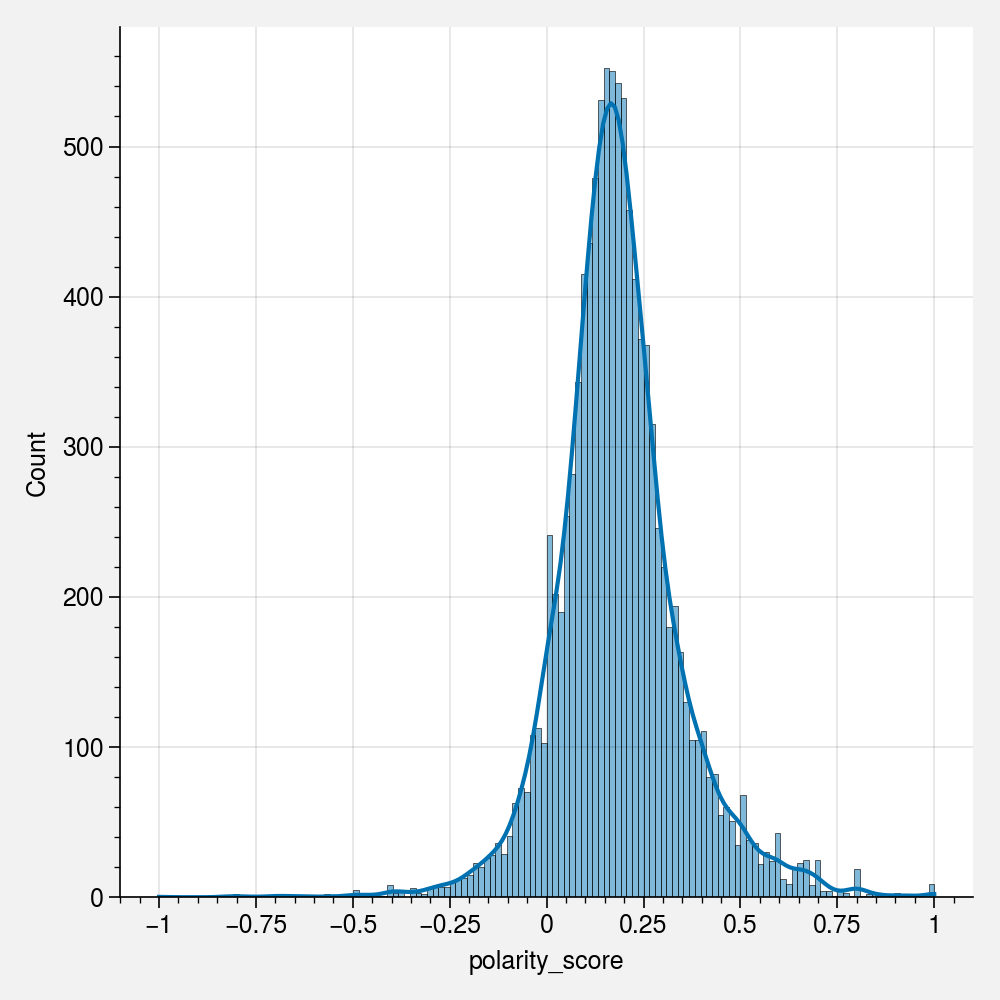

In [12]:
sns.displot(data=df, x="polarity_score", kde=True)

Visualize jointplot of 'polarity_score' column again 'overall' column

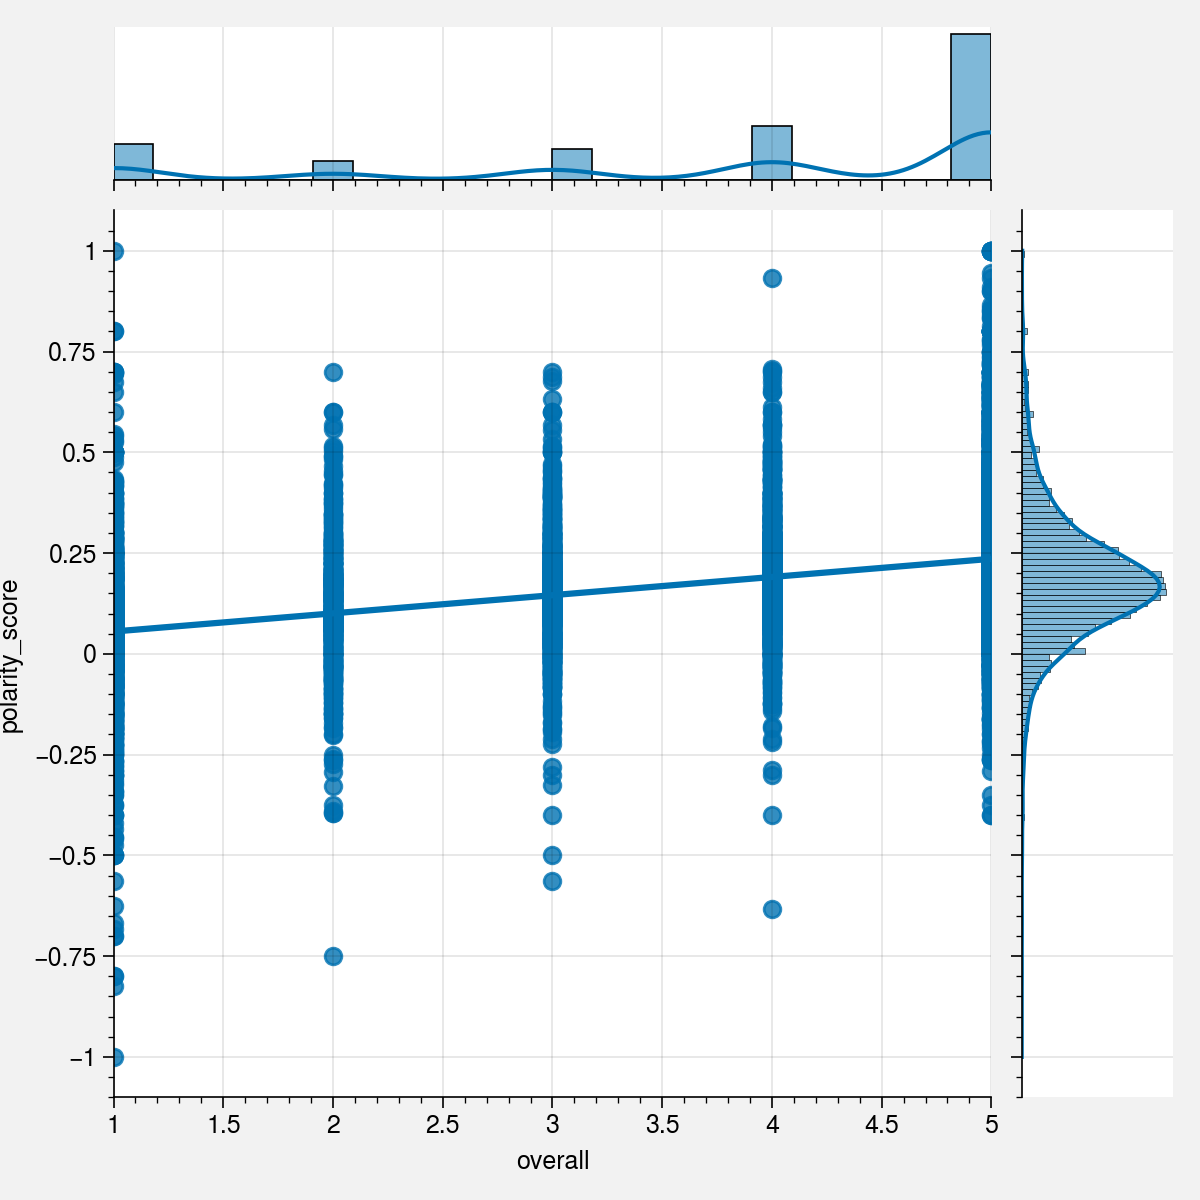

In [13]:
sns.jointplot(data=df, x='overall', y='polarity_score', kind='reg')